# Aula 01 - Hiperparâmetros, overfit e otimização

In [ ]:
!pip install graphviz==0.9
!pip install pydot
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [ ]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [49.79, 53.45]


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [ ]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [ ]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [ ]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [ ]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


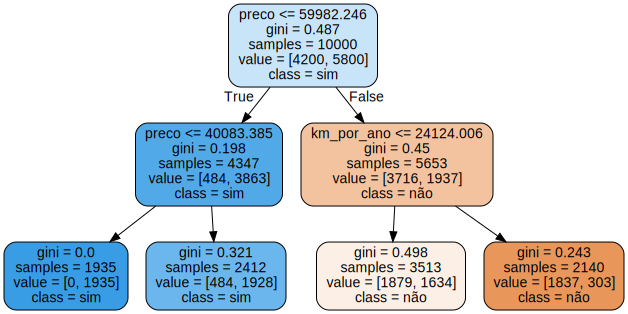

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)

features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                        class_names=['não', 'sim'],
                        feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [ ]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


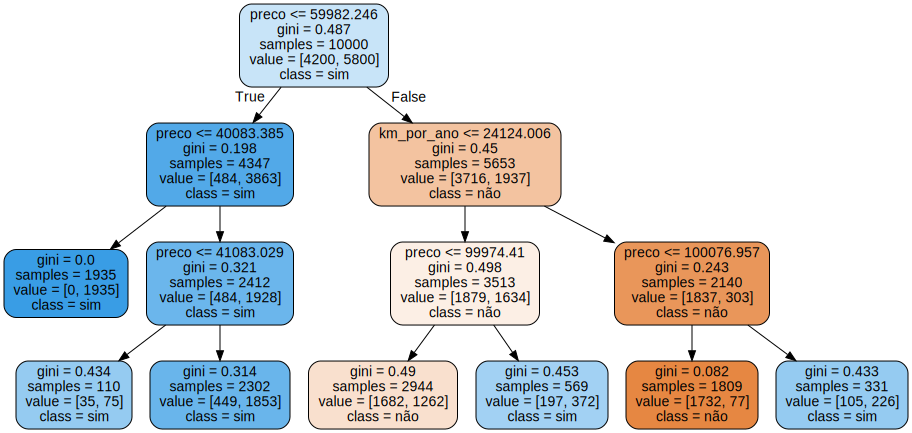

In [ ]:
modelo.fit(x_azar, y_azar)

features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                        class_names=['não', 'sim'],
                        feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [ ]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


In [ ]:
def modelo_tree(n_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=n_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = (results['train_score'].mean() * 100)
    test_score = (results['test_score'].mean() * 100)
    print("Profundidade da DecisionTree: %d, score do treino: %.2f, score do teste: %.2f" % (n_depth, train_score, test_score))
    tabela = [n_depth, train_score, test_score]
    return tabela

resultados = [modelo_tree(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns=['n_profundidade', 'train', 'test'])
resultados.head()

Profundidade da DecisionTree: 1, score do treino: 75.79, score do teste: 75.78
Profundidade da DecisionTree: 2, score do treino: 75.79, score do teste: 75.78
Profundidade da DecisionTree: 3, score do treino: 78.75, score do teste: 78.67
Profundidade da DecisionTree: 4, score do treino: 78.79, score do teste: 78.63
Profundidade da DecisionTree: 5, score do treino: 78.94, score do teste: 78.56
Profundidade da DecisionTree: 6, score do treino: 79.17, score do teste: 78.12
Profundidade da DecisionTree: 7, score do treino: 79.50, score do teste: 77.96
Profundidade da DecisionTree: 8, score do treino: 79.89, score do teste: 77.86
Profundidade da DecisionTree: 9, score do treino: 80.46, score do teste: 77.38
Profundidade da DecisionTree: 10, score do treino: 81.16, score do teste: 77.19
Profundidade da DecisionTree: 11, score do treino: 82.03, score do teste: 76.97
Profundidade da DecisionTree: 12, score do treino: 82.89, score do teste: 76.49
Profundidade da DecisionTree: 13, score do treino

,n_profundidade,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


> Exemplo de OverFit

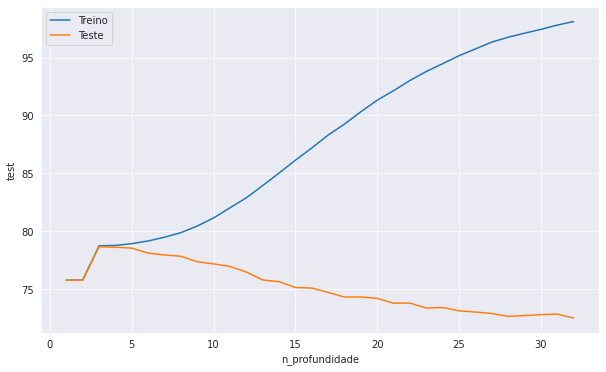

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.lineplot(x='n_profundidade', y='train', data=resultados)
sns.lineplot(x='n_profundidade', y='test', data=resultados)
plt.legend(['Treino', 'Teste'])

# Aula 2 - Explorando 2 dimensões de hiperparâmetros

In [ ]:
def modelo_tree(n_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=n_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = (results['train_score'].mean() * 100)
    test_score = (results['test_score'].mean() * 100)
    print("max_depth: %d, min_samples_leaf: %d, score do treino: %.2f, score do teste: %.2f" % (n_depth, min_samples_leaf, train_score, test_score))
    tabela = [n_depth, min_samples_leaf, train_score, test_score]
    return tabela

resultados = []
for depth in range(1,33):
    for leaf in [32,64,128,256]:
        tabela = modelo_tree(depth, leaf)
        resultados.append(tabela)

resultados = pd.DataFrame(resultados, columns=['n_profundidade', 'min_samples_leaf', 'train', 'test'])
resultados.sort_values('test', ascending=False).head()

max_depth: 1, min_samples_leaf: 32, score do treino: 75.79, score do teste: 75.78
max_depth: 1, min_samples_leaf: 64, score do treino: 75.79, score do teste: 75.78
max_depth: 1, min_samples_leaf: 128, score do treino: 75.79, score do teste: 75.78
max_depth: 1, min_samples_leaf: 256, score do treino: 75.79, score do teste: 75.78
max_depth: 2, min_samples_leaf: 32, score do treino: 75.79, score do teste: 75.78
max_depth: 2, min_samples_leaf: 64, score do treino: 75.79, score do teste: 75.78
max_depth: 2, min_samples_leaf: 128, score do treino: 75.79, score do teste: 75.78
max_depth: 2, min_samples_leaf: 256, score do treino: 75.79, score do teste: 75.78
max_depth: 3, min_samples_leaf: 32, score do treino: 78.75, score do teste: 78.67
max_depth: 3, min_samples_leaf: 64, score do treino: 78.75, score do teste: 78.67
max_depth: 3, min_samples_leaf: 128, score do treino: 78.75, score do teste: 78.67
max_depth: 3, min_samples_leaf: 256, score do treino: 78.75, score do teste: 78.67
max_depth:

,n_profundidade,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [ ]:
corr = resultados.corr()
corr

,n_profundidade,min_samples_leaf,train,test
n_profundidade,1.000000,0.000000,0.536705,-0.027675
min_samples_leaf,0.000000,1.000000,-0.409676,0.349011
train,0.536705,-0.409676,1.000000,0.116466
test,-0.027675,0.349011,0.116466,1.000000


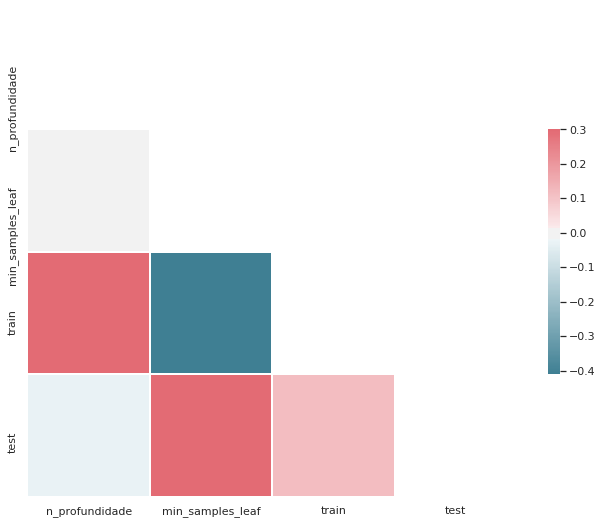

In [ ]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
resultados = []
for depth in range(1,33):
    for leaf in [128,192,256,512]:
        tabela = modelo_tree(depth, leaf)
        resultados.append(tabela)

resultados = pd.DataFrame(resultados, columns=['n_profundidade', 'min_samples_leaf', 'train', 'test'])
resultados.sort_values('test', ascending=False).head()

In [ ]:
corr = resultados.corr()
corr

,n_profundidade,min_samples_leaf,train,test
n_profundidade,1.000000,0.000000,0.354588,0.240852
min_samples_leaf,0.000000,1.000000,-0.637649,-0.440661
train,0.354588,-0.637649,1.000000,0.909222
test,0.240852,-0.440661,0.909222,1.000000


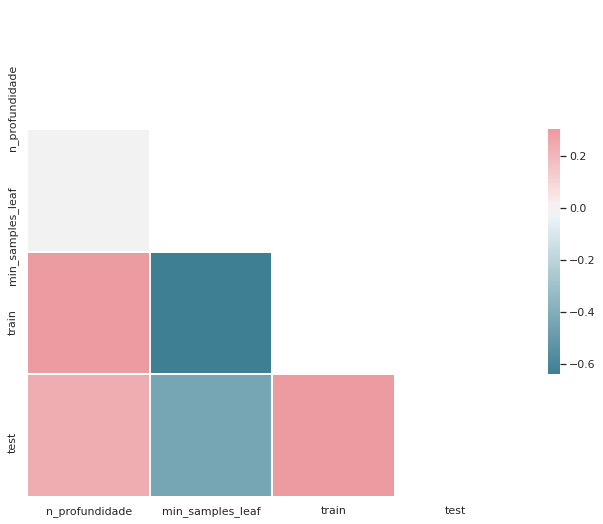

In [ ]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Aula 03 - Trabalhando com 3 ou mais hiperparâmetros

In [ ]:
def modelo_tree(n_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=n_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = (results['train_score'].mean() * 100)
    test_score = (results['test_score'].mean() * 100)
    tabela = [n_depth, min_samples_leaf, min_samples_split, train_score, test_score]
    return tabela

resultados = []
for depth in range(1,33):
    for leaf in [32,64,128,256]:
        for split in [32,64,128,256]:
            tabela = modelo_tree(depth, leaf, split)
            resultados.append(tabela)

resultados = pd.DataFrame(resultados, columns=['n_profundidade', 'min_samples_leaf', 'min_samples_split', 'train', 'test'])
resultados.sort_values('test', ascending=False).head()

,n_profundidade,min_samples_leaf,min_samples_split,train,test
63,4,256,256,78.750993,78.672633
48,4,32,32,78.750993,78.672633
34,3,32,128,78.750993,78.672633
35,3,32,256,78.750993,78.672633
36,3,64,32,78.750993,78.672633


In [ ]:
corr = resultados.corr()
corr

,n_profundidade,min_samples_leaf,min_samples_split,train,test
n_profundidade,1.000000,0.000000,0.000000,0.529391,0.011529
min_samples_leaf,0.000000,1.000000,0.000000,-0.341222,0.286555
min_samples_split,0.000000,0.000000,1.000000,-0.126171,0.132827
train,0.529391,-0.341222,-0.126171,1.000000,0.247850
test,0.011529,0.286555,0.132827,0.247850,1.000000


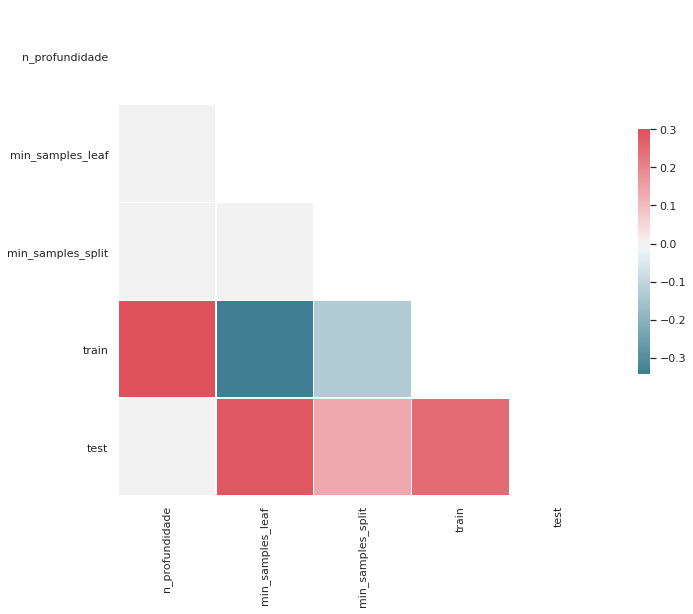

In [ ]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Aula 04 - Busca de parâmetros com o GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

parametros = {
    'max_depth' : [3,5],
    'min_samples_leaf' : [32,64,128],
    'min_samples_split' : [32,64,128],
    'criterion' : ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(), parametros, cv = KFold(n_splits=5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011020,0.000785,0.001577,0.000159,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.009892,0.000226,0.001398,0.000035,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.009791,0.000291,0.001389,0.000073,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.009758,0.000168,0.001409,0.000095,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.009785,0.000118,0.001420,0.000043,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [ ]:
print(busca.best_params_)
print(busca.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
0.787


In [ ]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Aula 05 - Nested cross validation e validando o modelo escolhido

In [ ]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
results

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [ ]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [ ]:
imprime_score(results)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


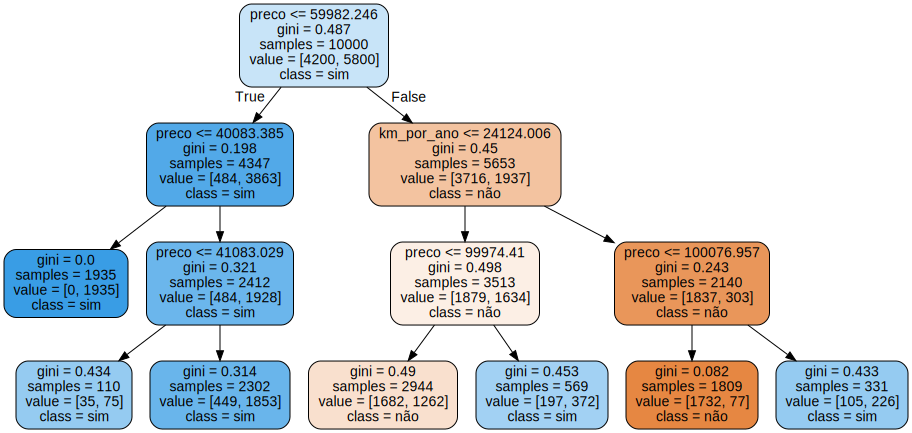

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph